In [1]:
from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

ACT-R connection has been started.


# Stay Probability

Compare the stay probabilityt of Model-free vs. Model-based

In [2]:
def simulate_stay_probability(model="markov-model1", epoch=1, n=20):
    
    rewards = 0.0
    df_state1stay = []
    for i in tqdm(range(epoch)):
        m = MarkovACTR(setup=False) 
        m.setup(model, verbose=False)
        if (i==0): print(m)
        m.run_experiment(n)
        df = m.calculate_stay_probability()
        df_state1stay.append(df.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index())

        # plot 
        rewards += df['received_reward'].sum()
        
        
    print('--- simulation ---', epoch)
    print('mean reward =', str(rewards/epoch))
    dff = pd.concat(df_state1stay, axis=0)
    ax = sns.pointplot(data=dff, x='received_reward', y='state1_stay',
                       hue='state_frequency',
                       order = sorted(df['received_reward'].unique(), reverse=True), 
                       join=True, dodge=True) 
    ax.set(ylim=(0, 1.1))
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
    
    if model=="markov-model1": plt.title('markov-model-free') 
    else: plt.title('markov-model-base')
    plt.show()
    
    return df_state1stay

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7} <<
 	>> ACT-R PARAMETERS: None <<



100%|██████████| 10/10 [00:15<00:00,  1.56s/it]


--- simulation --- 10
mean reward = 91.8


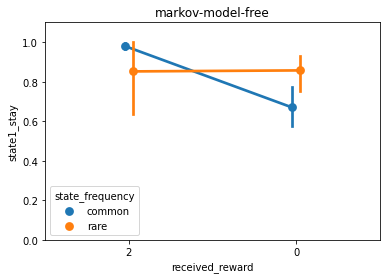

In [3]:
sim1 = simulate_stay_probability(model="markov-model1", epoch=10, n=100)

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7} <<
 	>> ACT-R PARAMETERS: None <<



100%|██████████| 10/10 [00:18<00:00,  1.87s/it]

--- simulation --- 10
mean reward = 67.4


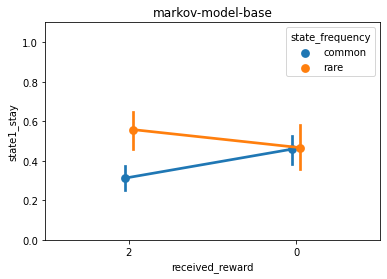

In [4]:
sim2 = simulate_stay_probability(model="markov-model2", epoch=10, n=100)